DBSCAN是一种基于密度的聚类方法，聚类前不需要预先指定聚类的个数，生成的簇的个数不定（和数据有关）。

该算法利用基于密度的聚类的概念，即要求聚类空间中的一定区域内所包含对象（点或其他空间对象）的数目不小于某一给定阈值。

该方法能在具有噪声的空间数据库中发现任意形状的簇，可将密度足够大的相邻区域连接，能有效处理异常数据。

DBSCAN算法将数据点分为三类：

-> 核心点：在半径Eps内含有不少于MinPts数目的点

-> 边界点：在半径Eps内点的数量小于MinPts，但是落在核心 点的邻域内

-> 噪音点：既不是核心点也不是边界点的点

In [46]:
import pandas as pd
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [47]:
features_struct = io.loadmat('mydata.mat')
features = features_struct['X']
dfdata = pd.DataFrame(features)
dfdata.head()

,0,1
0,0.851403,-0.473130
1,-0.014339,0.689712
2,-0.022594,-0.284256
3,-0.061004,-1.252882
4,1.801172,-0.043953


In [48]:
# 1）eps：邻域的距离阈值，和样本距离超过ϵ的样本点不在ϵ-邻域内。默认值是0.5
# 2）min_samples：样本点要成为核心对象所需要的ϵ-邻域的样本数阈值。默认值是5.
db = DBSCAN(eps=0.5, min_samples=6)
db.fit(dfdata)

y_train = db.labels_
temp_data = dfdata
temp_data['category'] = y_train
temp_data.columns = ['x', 'y', 'category']
temp_data.head()

,x,y,category
0,0.851403,-0.473130,0
1,-0.014339,0.689712,0
2,-0.022594,-0.284256,0
3,-0.061004,-1.252882,0
4,1.801172,-0.043953,0


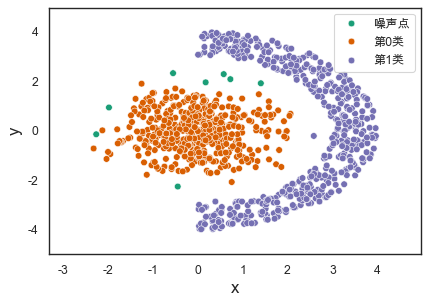

In [49]:
sns.set(style='white', font='Arial Unicode MS')

fig, ax = plt.subplots(figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x='x', y='y', data=temp_data, hue='category', palette='Dark2')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['噪声点', '第0类', '第1类'])

plt.xlim(min(dfdata.iloc[:, 0]) - 1, max(dfdata.iloc[:,0]) + 1)
plt.ylim(min(dfdata.iloc[:, 1]) - 1, max(dfdata.iloc[:,1]) + 1)

plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()

/var/folders/jx/qjmq1fjs6gzbf9wp5ynyctmw0000gn/T/ipykernel_24937/1323746500.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter('x', 'y', data=temp_data[temp_data.category==ctg],


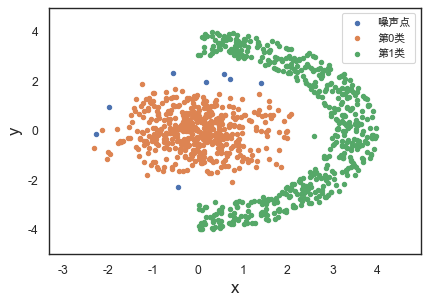

In [50]:
sns.set(style='white', font='Arial Unicode MS')

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
plt.figure(figsize=(6, 4), dpi= 80, facecolor='w', edgecolor='k')

for ctg in np.unique(y_train):
    plt.scatter('x', 'y', data=temp_data[temp_data.category==ctg], 
                cmap=colors[ctg], s=15, label='第%d类'% ctg if ctg != -1 else '噪声点')
    
plt.xlim(min(dfdata.iloc[:, 0]) - 1, max(dfdata.iloc[:, 0]) + 1)
plt.ylim(min(dfdata.iloc[:, 1]) - 1, max(dfdata.iloc[:, 1]) + 1)
plt.legend(fontsize=10)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()